In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [75]:
df_csv = pd.read_csv('Topic_Survey_Assignment.csv',
                    )
df_csv.drop(['Timestamp'], axis=1, inplace=True)
colnames = []
rownames = set()
for colname in df_csv.columns:
    colnames.append(colname.split('[')[1].split(']')[0])
df_csv.columns = colnames
for c in colnames:
    rownames |= (set(df_csv[c].unique()))
if np.nan in rownames: rownames.remove(np.nan)

['Data Visualization', 'Machine Learning', 'Data Analysis / Statistics', 'Big Data (Spark / Hadoop)', 'Data Journalism', 'Deep Learning']


In [82]:
data = dict.fromkeys(colnames, {})
for c in colnames:
    counts = df_csv[c].value_counts().tolist()
    keys = df_csv[c].value_counts().index.tolist()
    data[c] = dict(zip(keys, counts))
df_surveyCount = pd.DataFrame.from_dict(data).transpose()
df_surveyCount.sort_index(inplace=True)
df_surveyCount

,Not interested,Somewhat interested,Very interested
Big Data (Spark / Hadoop),127,729,1332
Data Analysis / Statistics,60,444,1688
Data Journalism,610,1081,429
Data Visualization,102,734,1340
Deep Learning,136,770,1263
Machine Learning,74,477,1629


In [78]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') 


print ('Matplotlib version: ', mpl.__version__) 

Matplotlib version:  2.2.2


In [86]:

col = sorted(df_surveyCount.columns.tolist(), reverse=True)
df_surveyCount = df_surveyCount[col]


df_surveyCount.sort_values(by=['Very interested'], axis=0, ascending=False, inplace=True)
df_surveyCount

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [113]:

totStudents = df_csv.shape[0]
df_surveyPercent = df_surveyCount.copy()

df_surveyPercent = df_surveyPercent.astype(float)
# print(df_surveyPercent.dtypes)
for i, row in df_surveyPercent.iterrows():
    for j, col in row.iteritems():
        df_surveyPercent.at[i , j]= round((1.0*col)/totStudents, 2)
df_surveyPercent

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,0.76,0.20,0.03
Machine Learning,0.73,0.21,0.03
Data Visualization,0.60,0.33,0.05
Big Data (Spark / Hadoop),0.60,0.33,0.06
Deep Learning,0.57,0.34,0.06
Data Journalism,0.19,0.48,0.27


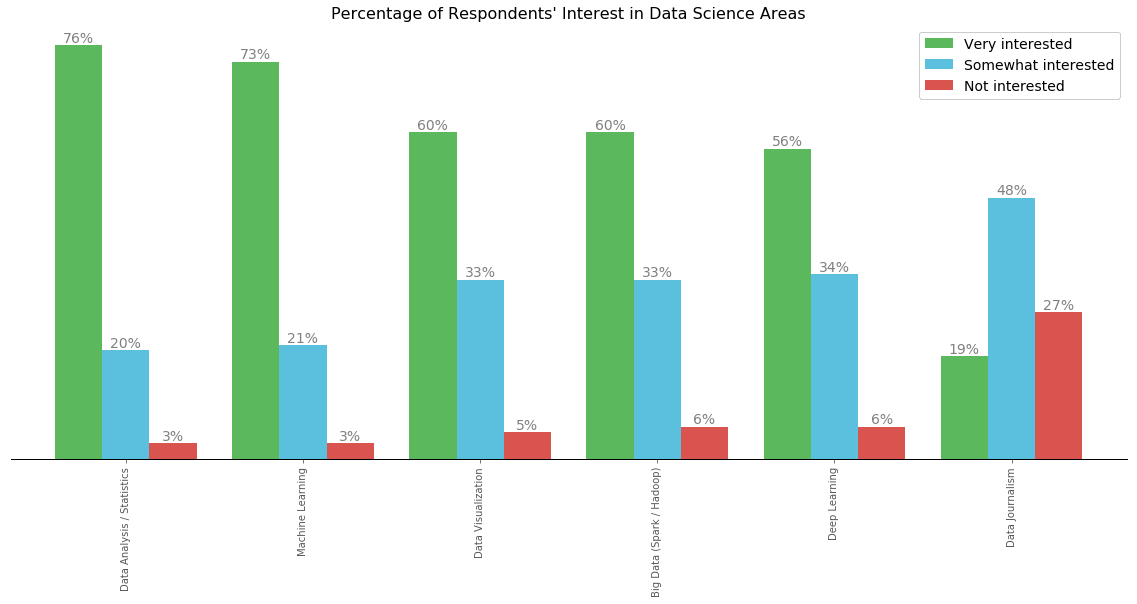

In [154]:
ax = df_surveyPercent.plot(kind='bar',
                          figsize=(20,8),
                          width=0.8, 
                          color=['#5cb85c', '#5bc0de', '#d9534f'])
ax.set_title("Percentage of Respondents' Interest in Data Science Areas",
            fontsize = 16,
            )
ax.set_facecolor('white')
ax.legend(fontsize=14, facecolor='white', edgecolor='gray')
# Make some labels.
rects = ax.patches
labels = ["%d%%" % (100*i.get_height()) for i in rects]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, label, color='gray',
            ha='center', va='bottom', fontsize=14,
            )
# Hide the left, right and top spines
ax.tick_params(top=False, left=False, right=False)
ax.tick_params(labeltop=False, labelleft=False, labelright=False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('black')
ax.xaxis.label.set_size(14)

In [10]:
import pandas as pd
df_sanfran = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')
df_sanfran = pd.DataFrame(df_sanfran['PdDistrict'])
df_sanfran.columns = ['Neighborhood']
df_sanfran.head()
count = df_sanfran['Neighborhood'].value_counts()

In [19]:
df_sanfranCount = pd.DataFrame(count)
df_sanfranCount.reset_index(inplace=True)
df_sanfranCount.columns = ['Neighborhood', 'Count']
df_sanfranCount

,Neighborhood,Count
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


In [20]:
# download countries geojson file
!wget --quiet https://cocl.us/sanfran_geojson/san-francisco.geojson -O san-francisco.geojson
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
!conda install -c conda-forge folium --yes
import folium

print('Folium installed and imported!')

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs: 
    - folium


The following NEW packages will be INSTALLED:

    altair:                 3.1.0-py37_0  conda-forge
    branca:                 0.3.1-py_0    conda-forge
    conda-package-handling: 1.3.10-py37_0 conda-forge
    folium:                 0.9.1-py_0    conda-forge
    vincent:                0.4.4-py_1    conda-forge

The following packages will be UPDATED:

    conda:                  4.5.12-py37_0             --> 4.7.5-py37_0 conda-forge

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... failed
Rolling back transaction: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.7.5

Please update conda by running

    $ conda update -n base -c defaults conda


ERROR conda.core.link:_execute(507): An error occurred while uninstalling package 'defaults::conda-4.5.12-py37_0'.
PermissionError(13, 'Access is denied')
Attempting to roll back.


PermissionError(13, 'Access is denied')




ModuleNotFoundError: No module named 'folium'

In [23]:
sanfran_geo = r'san-francisco_temp.geojson' # geojson file
# create a plain world map
import folium
world_map = folium.Map(
            location=(37.7749, -122.4194),
            zoom_start=12,
            )
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=sanfran_geo,
    data=df_sanfranCount,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco',
)
# display map
world_map

ModuleNotFoundError: No module named 'folium'